In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(42)
%matplotlib inline

In [226]:
dfTrain=pd.read_csv('AITrain.csv')

In [194]:
dfTest=pd.read_csv('AITest.csv')

The project poses some questions about this experiment:

**1. Does an individual make more than 50k income or not?**

**2. What are the most important features that help to define the income of an individual?**

# Train Data

 # EDA


In [87]:
dfTrain.head(5)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country Income   
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [88]:
dfTrain.shape

(32561, 15)

In [89]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There is no nulls but we have to check what is in the columns.

In [90]:
# Number of records where individual's income is more than $50,000
n_greater_50k = dfTrain[dfTrain['Income '] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = dfTrain[dfTrain['Income '] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k /32561 ) * 100

print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Individuals making more than $50k: 24720
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


# Data Cleaning

In [227]:
# drop uneeded columns
dfTrain.drop(['education','fnlwgt'], inplace=True, axis=1)

We have dropped the education feature. Which is a duplicate feature of education_num, but in a nonnumerical format.

In an income prediction dataset, the "fnlwgt" column (short for final weight) is a statistical weighting factor assigned to each individual in the dataset. It is calculated based on the demographic characteristics of the individual, such as age, race, sex, education level, and occupation, and is used to ensure that the sample of individuals in the dataset is representative of the population from which it was drawn.

It is worth noting that the fnlwgt column is a somewhat controversial feature of the dataset, as it has been criticized for being opaque and difficult to interpret, and for potentially introducing biases into statistical analyses

In [92]:
for col in dfTrain.columns:
    unique_vals = dfTrain[col].unique()
    print(col)
    print(unique_vals)

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' '

We found that workclass,occupation and native-country have '?' which means null.

In [93]:
dfTrain.describe()

age  education-num  capital-gain  capital-loss  hours-per-week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000

### Check for nulls

In [94]:
dfTrain.isna().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

It appears that there are no null values occurred in the dataset.

### Check for duplicates

In [228]:
# check duplicates and remove it
print("Before removing duplicates:",dfTrain.duplicated().sum())

dfTrain = dfTrain[~dfTrain.duplicated()]

print("After removing duplicates:", dfTrain.duplicated().sum())

Before removing duplicates: 3465
After removing duplicates: 0


### Handling '?'

In [229]:
col_names = dfTrain.columns
num_data = dfTrain.shape[0]
for c in col_names:
    num_non = dfTrain[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
1632
5.61%


occupation
1639
5.63%


native-country
580
1.99%




As it is categorical data we will replace it with mode.

In [230]:
dfTrain.loc[dfTrain['workclass'] == ' ?', 'workclass' ] = dfTrain['workclass'].mode()
dfTrain.loc[dfTrain['occupation'] == ' ?', 'occupation' ] = dfTrain['occupation'].mode()
dfTrain.loc[dfTrain['native-country'] == ' ?', 'native-country' ] = dfTrain['native-country'].mode()

# Data Visualization

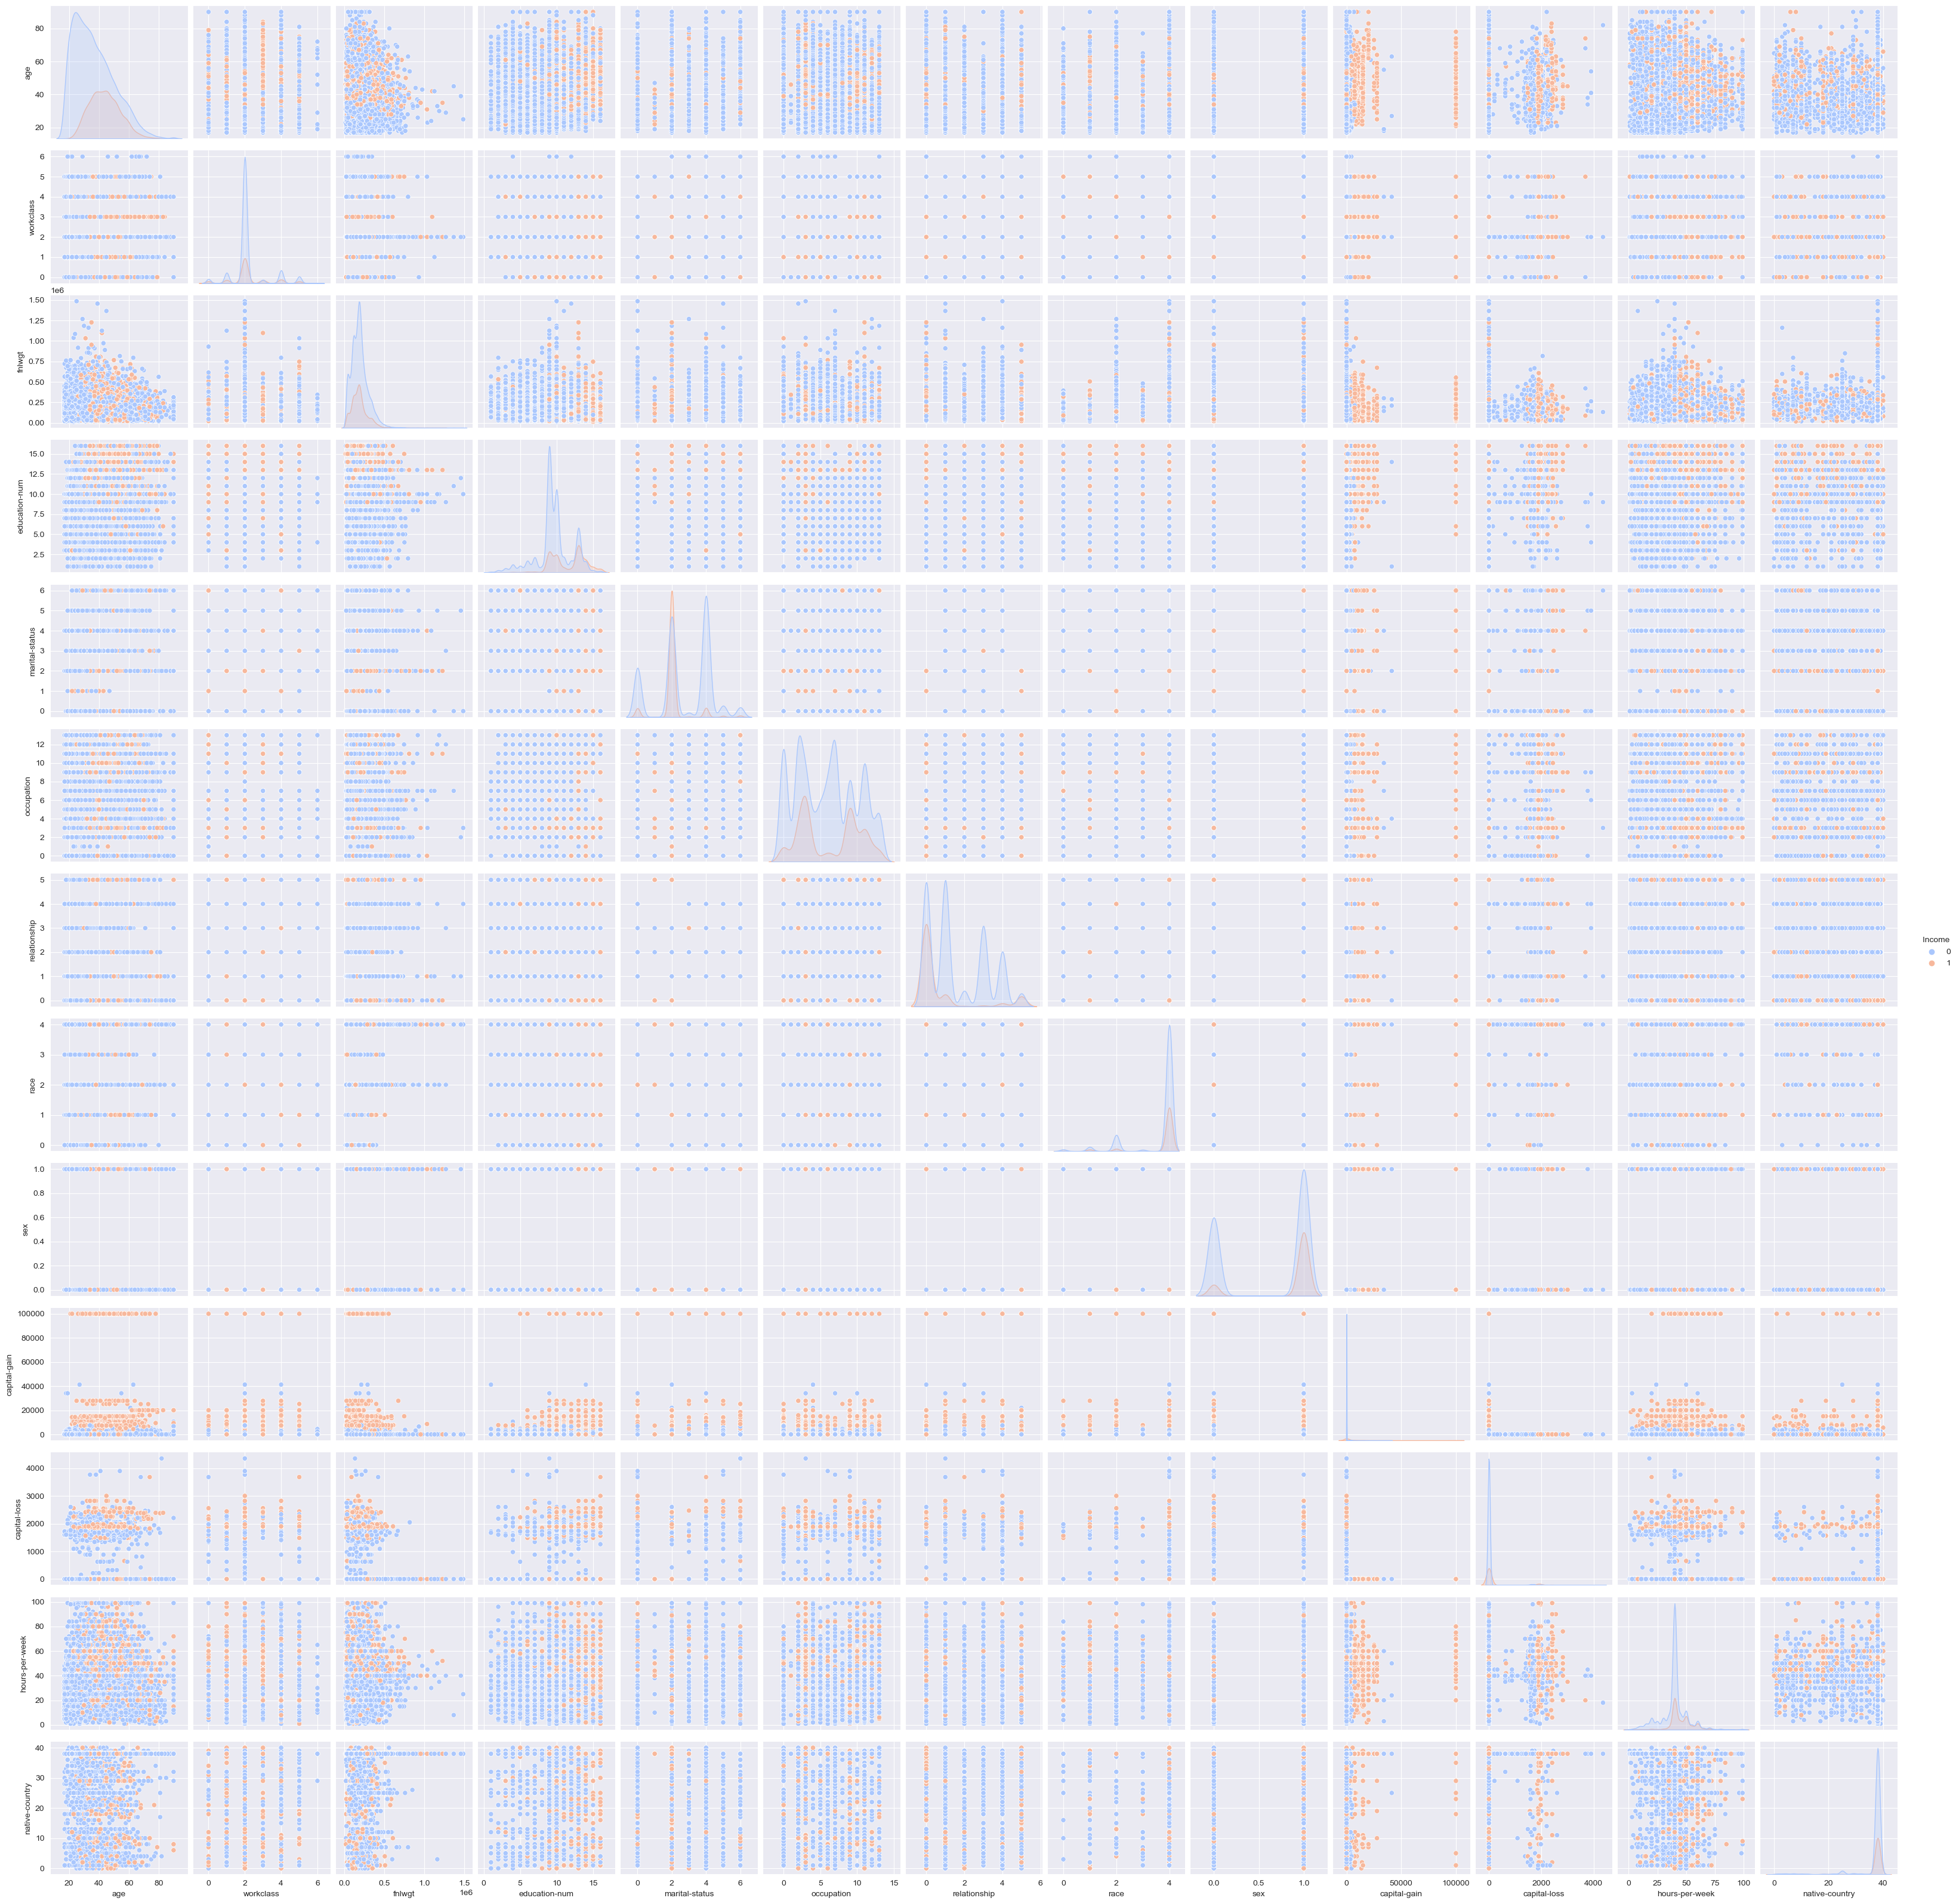

In [322]:
sns.pairplot(dfTrain,hue='Income ',palette='coolwarm')

<AxesSubplot:title={'center':'Income Distribution of Adults'}, xlabel='income', ylabel='Percentage'>

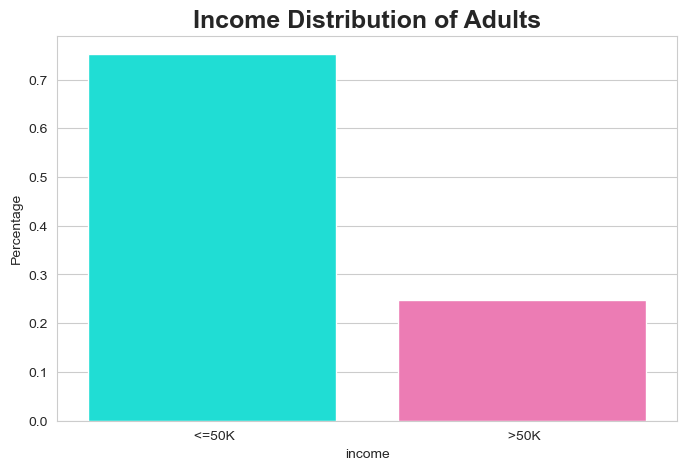

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
income_percentage = dfTrain['Income '].value_counts(1).rename_axis('income').reset_index(name = 'Percentage')
sns.barplot(x = 'income', y = 'Percentage', data = income_percentage, palette=["#00fdf0","hotpink"])



### We can see that people who earn below or equal to 50k are 75.9% of the data and 24.1% of them earn above 50k dollars.

In [32]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

dfTrain['age_group'] = dfTrain['age'].apply(age_group)

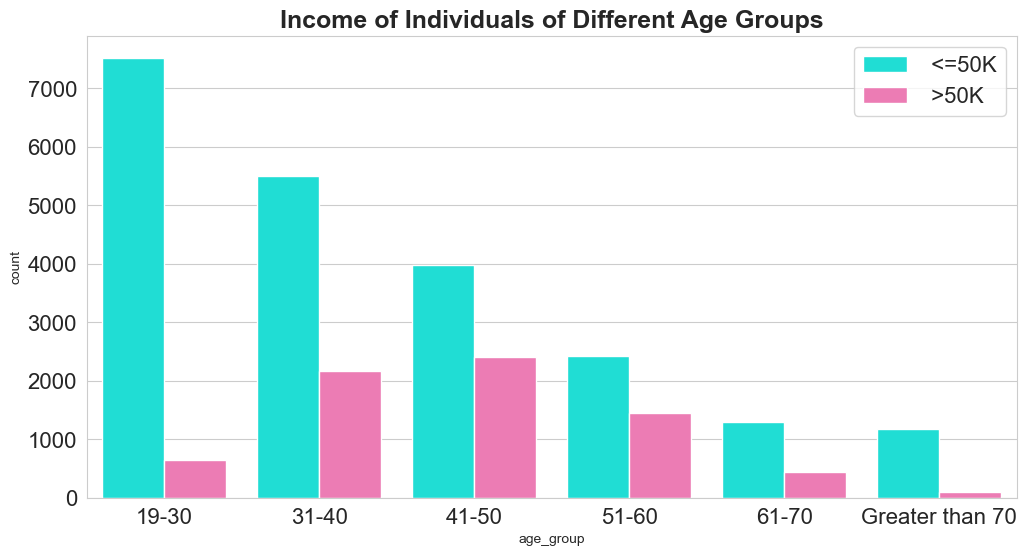

In [33]:
#So, more experience more salary:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=dfTrain['age_group'], hue = dfTrain['Income '], palette=["#00fdf0","hotpink"], order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Here it's easy to notest that most people who earn more than 50k are aged between 41-50 and the least people who earn more than 50k are aged between 19-30.

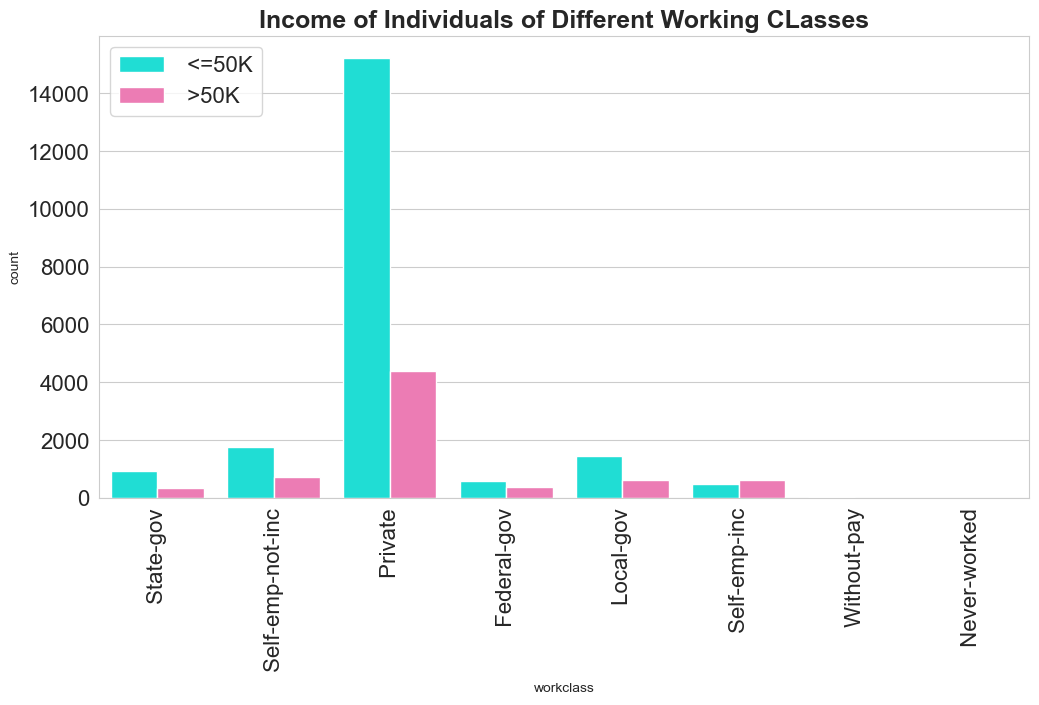

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x=dfTrain['workclass'], hue = dfTrain['Income '], palette=["#00fdf0","hotpink"])
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### it's quite interesting that the people who work for them self is more likely to earn more than 50k and less than 50k. so we can say when you handle your own business, you are more likely to earn better if it gets successful!

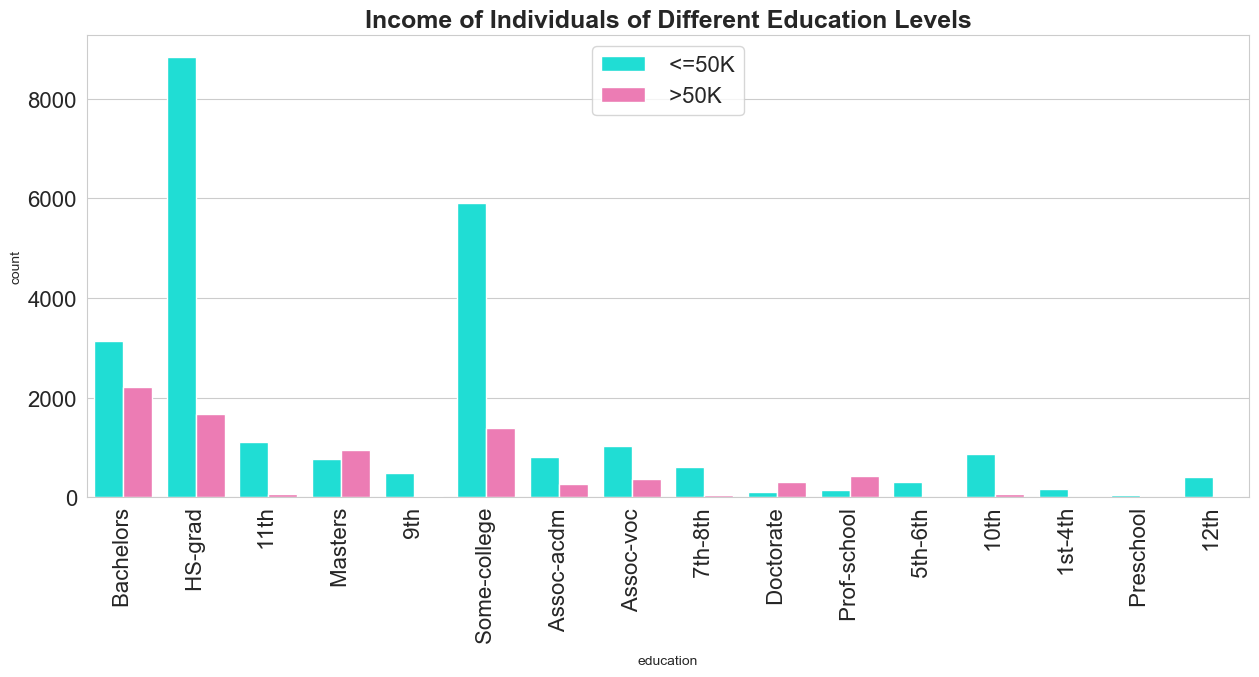

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(x=dfTrain['education'], hue = dfTrain['Income '], palette=["#00fdf0","hotpink"])
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### For the people who have completed their education up till 12th Standard, there are just a little of them who earn more than 50K dollars . Most of the people earn below 50K!

### For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars than the number of people earning less than it.

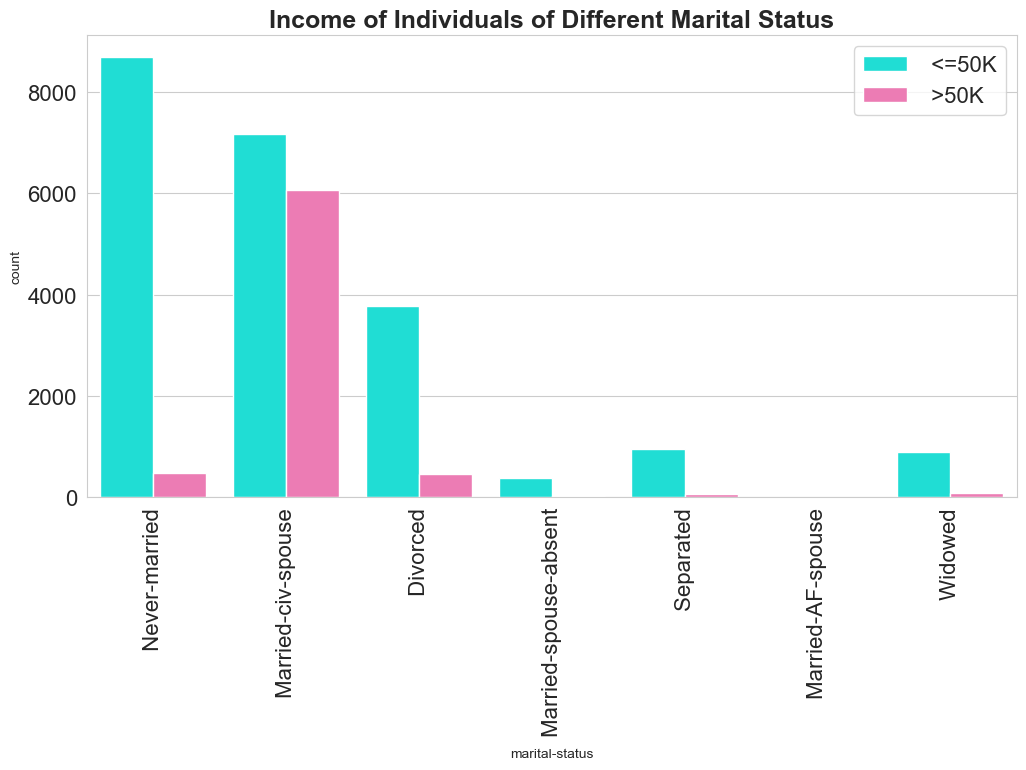

In [59]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x=dfTrain['marital-status'], hue = dfTrain['Income '], palette=["#00fdf0","hotpink"])
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Married people are more likely to earn more than 50k dollars, while other people are more likely to earn less than 50k dollars

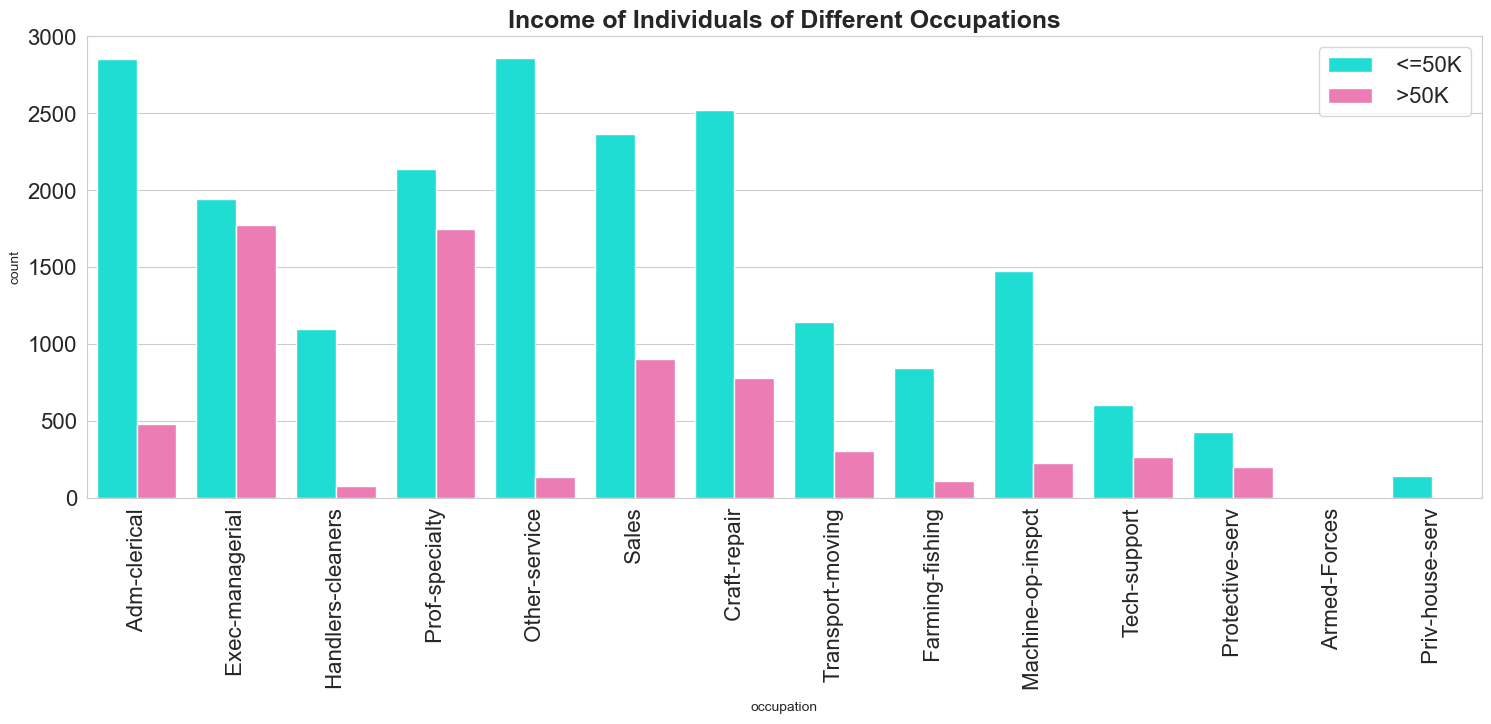

In [60]:
plt.figure(figsize=(18,6))
sns.countplot(x=dfTrain['occupation'], hue = dfTrain['Income '], palette=["#00fdf0","hotpink"])
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### People working as prof-specialty, Exec-managerial and in an administrative works are likely to earn more than 50K dollars.
### People working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, ### Priv-house-serv, handlers-cleaners, Transport-moving are very less likely to earn more than 50K dollars.
### Around 25% of the people working in Sales earn more than 50K dollars an year.

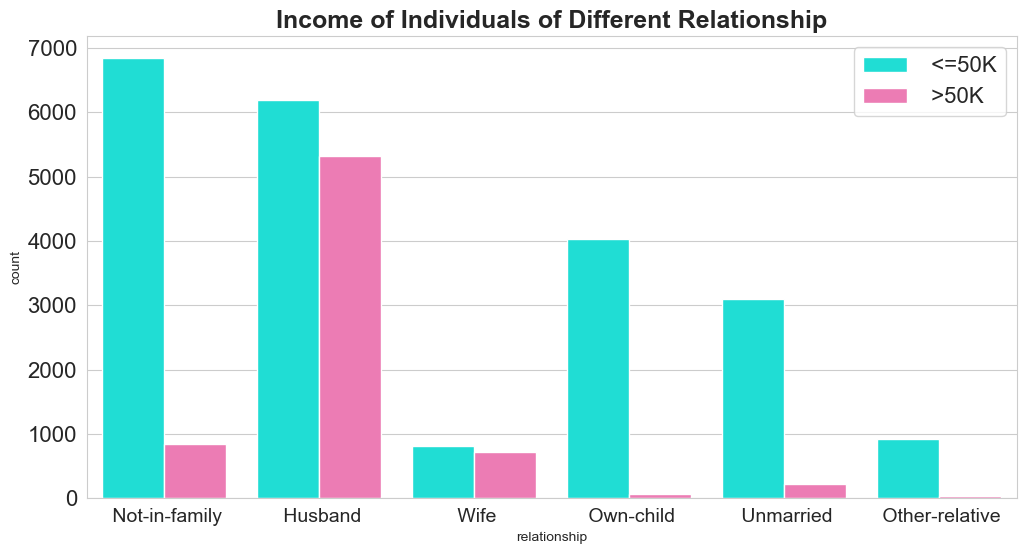

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x=dfTrain['relationship'], hue = dfTrain['Income '],palette=["#00fdf0","hotpink"])
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### There are just a handful of Unmarried people earning more than 50K dollars an year.
### Wives and husbands are more likely to earn more than 50k dollars.
### The percentage of wives that earn more than 50k and less than 50k are so close.

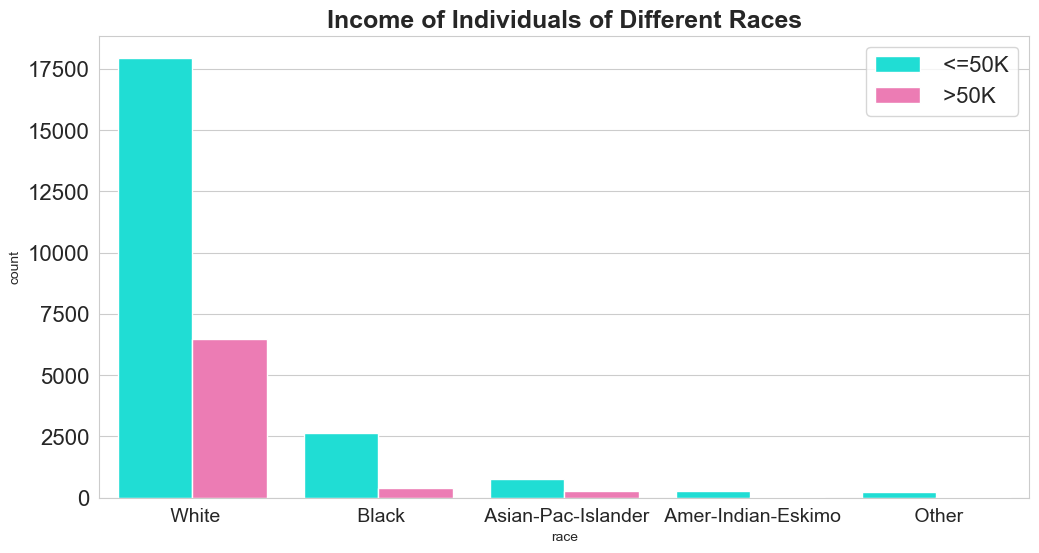

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x=dfTrain['race'], hue = dfTrain['Income '], palette=["#00fdf0","hotpink"])
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### The only race that has more probability to earn more than 50k dollars are white people

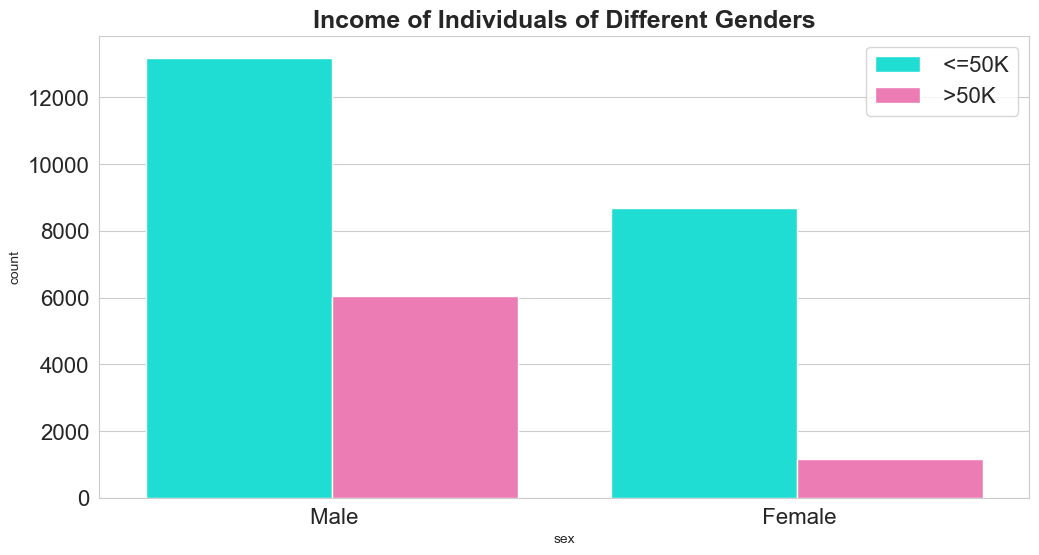

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(x=dfTrain['sex'], hue = dfTrain['Income '], palette=["#00fdf0","hotpink"])
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### We can see a gap between males and females in earning money, as males have more probability to earn more than 50k dollars.

# Outliers

<AxesSubplot:>

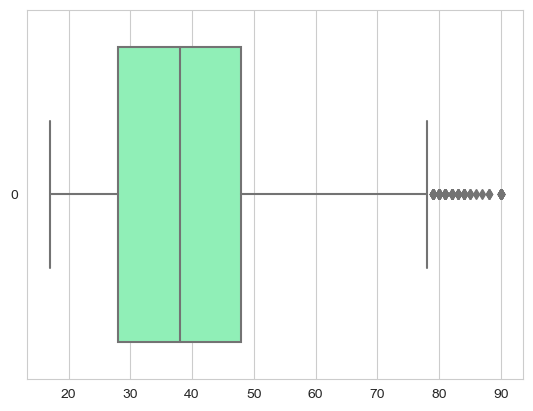

In [98]:
sns.boxplot(data=dfTrain['age'],palette='rainbow',orient='h')

<AxesSubplot:>

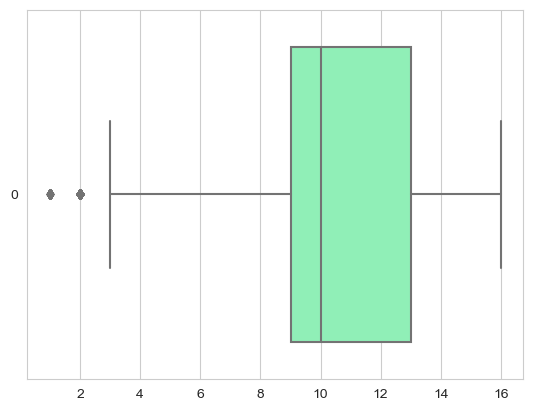

In [99]:
sns.boxplot(data=dfTrain['education-num'],palette='rainbow',orient='h')

<AxesSubplot:>

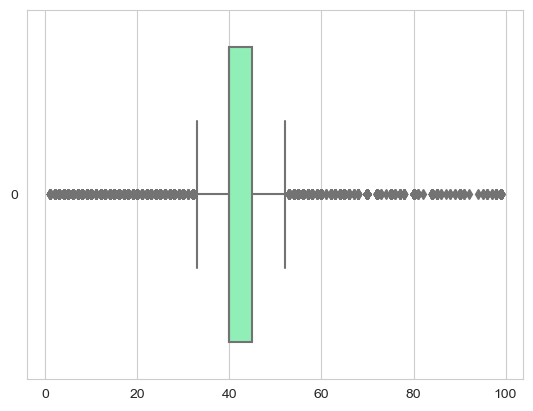

In [100]:
sns.boxplot(data=dfTrain['hours-per-week'],palette='rainbow',orient='h')

# Data Preprocessing

### Encoding

In [233]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = dfTrain.select_dtypes(include=['object']).columns.tolist()
encode = LabelEncoder()
for item in categorical_cols:
  dfTrain[item] = encode.fit_transform(dfTrain[item])
     

In [234]:
dfTrain.head()

age  workclass  education-num  marital-status  occupation  relationship  \
0   39          6             13               1           0             1   
1   50          5             13               0           3             0   
2   38          3              9               1           5             1   
3   53          3              7               0           5             0   
4   28          3             13               0           9             5   

   race  sex  capital-gain  capital-loss  hours-per-week  native-country  \
0     4    1          2174             0              40              38   
1     4    1             0             0              13              38   
2     4    1             0             0              40              38   
3     2    1             0             0              40              38   
4     2    0             0             0              40               4   

   Income   
0        0  
1        0  
2        0  
3        0  
4        0

In [235]:
dfTrain['native-country'].nunique()

42

In [236]:
dfTrain.shape

(29096, 13)

In [237]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29096 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             29096 non-null  int64
 1   workclass       29096 non-null  int64
 2   education-num   29096 non-null  int64
 3   marital-status  29096 non-null  int64
 4   occupation      29096 non-null  int64
 5   relationship    29096 non-null  int64
 6   race            29096 non-null  int64
 7   sex             29096 non-null  int64
 8   capital-gain    29096 non-null  int64
 9   capital-loss    29096 non-null  int64
 10  hours-per-week  29096 non-null  int64
 11  native-country  29096 non-null  int64
 12  Income          29096 non-null  int64
dtypes: int64(13)
memory usage: 3.1 MB


# Feature Selection

In [238]:
dfTrain['marital-status'].unique()

array([1, 0])

In [231]:
dfTrain['marital-status'].replace(' Divorced','not married',inplace=True)
dfTrain['marital-status'].replace(' Never-married','not married',inplace=True)
dfTrain['marital-status'].replace(' Separated','not married',inplace=True)
dfTrain['marital-status'].replace(' Widowed','not married',inplace=True)
dfTrain['marital-status'].replace(' Married-AF-spouse','married',inplace=True)
dfTrain['marital-status'].replace(' Married-civ-spouse','married',inplace=True)
dfTrain['marital-status'].replace(' Married-spouse-absent','married',inplace=True)


In [232]:
dfTrain['marital-status'].unique()

array(['not married', 'married'], dtype=object)

In [239]:
dfTrain['relationship'].unique()

array([1, 0, 5, 3, 4, 2])

## Chi-Square

In [46]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education-num   30139 non-null  int64
 4   marital-status  30139 non-null  int64
 5   occupation      30139 non-null  int64
 6   relationship    30139 non-null  int64
 7   race            30139 non-null  int64
 8   sex             30139 non-null  int64
 9   capital-gain    30139 non-null  int64
 10  capital-loss    30139 non-null  int64
 11  hours-per-week  30139 non-null  int64
 12  native-country  30139 non-null  int64
 13  Income          30139 non-null  int64
dtypes: int64(14)
memory usage: 4.5 MB


In [47]:
from scipy.stats import chi2_contingency
categorical_cols = dfTrain.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    contingency_table = pd.crosstab(dfTrain['Income '], dfTrain[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(col)
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)

If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is evidence of a significant association between the two variables. This suggests that the two columns are dependent on each other, and their values are not independent.

## ANOVA


In [48]:
import scipy.stats as stats

numeric_cols = dfTrain.select_dtypes(include=['int64']).columns.tolist()

for col in numeric_cols:
    f_value, p_value = stats.f_oneway(dfTrain['Income '],dfTrain[col])

    # Print results
    print(col)
    print('F-value:', f_value)
    print('P-value:', p_value)

age
F-value: 254679.7376999465
P-value: 0.0
workclass
F-value: 104455.74060559568
P-value: 0.0
fnlwgt
F-value: 97249.51586189344
P-value: 0.0
education-num
F-value: 439634.9207325595
P-value: 0.0
marital-status
F-value: 67337.15563743097
P-value: 0.0
occupation
F-value: 59840.78719480704
P-value: 0.0
relationship
F-value: 14976.267158157943
P-value: 0.0
race
F-value: 401035.8804338435
P-value: 0.0
sex
F-value: 13510.266362849568
P-value: 0.0
capital-gain
F-value: 655.409660895934
P-value: 8.773355291174537e-144
capital-loss
F-value: 1433.033232995046
P-value: 6.1782114044914e-310
hours-per-week
F-value: 347234.2570598104
P-value: 0.0
native-country
F-value: 1051354.0497601144
P-value: 0.0
Income 
F-value: 1.648018094087289e-30
P-value: 1.0


<AxesSubplot:>

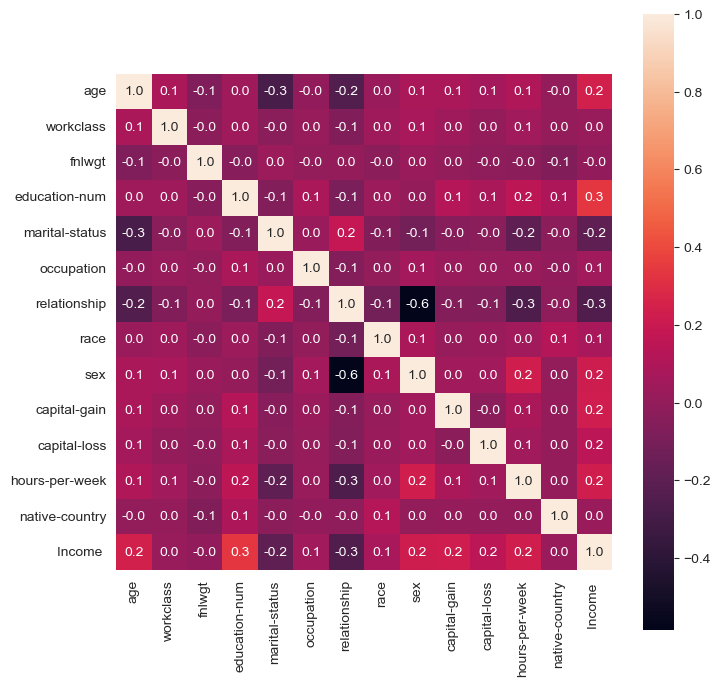

In [49]:
corr = dfTrain.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True)

# Test Data

In [195]:
dfTest.head()

age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country  Income   
0             0              40   United-States   <=50K.  
1             0              50   United-States   <=50K.  
2             0              40   United-States    >50K.  
3             0              40   United-States    >50K.  
4             0              30   United-States   <=50K.

In [196]:
dfTest.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [201]:
# drop uneeded columns
dfTest.drop(['education','fnlwgt'], inplace=True, axis=1)

In [198]:
col_names = dfTest.columns
num_data = dfTest.shape[0]
for c in col_names:
    num_non = dfTest[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
963
5.91%


occupation
966
5.93%


native-country
274
1.68%




In [199]:
dfTest.loc[dfTest['workclass'] == ' ?', 'workclass' ] = dfTest['workclass'].mode()
dfTest.loc[dfTest['occupation'] == ' ?', 'occupation' ] = dfTest['occupation'].mode()
dfTest.loc[dfTest['native-country'] == ' ?', 'native-country' ] = dfTest['native-country'].mode()

In [200]:
# check duplicates and remove it
print("Before removing duplicates:",dfTest.duplicated().sum())

dfTest = dfTest[~dfTest.duplicated()]

print("After removing duplicates:", dfTest.duplicated().sum())

Before removing duplicates: 5
After removing duplicates: 0


In [120]:
dfTest.shape

(15259, 13)

In [121]:
dfTest['marital-status'].replace(' Divorced','not married',inplace=True)
dfTest['marital-status'].replace(' Never-married','not married',inplace=True)
dfTest['marital-status'].replace(' Separated','not married',inplace=True)
dfTest['marital-status'].replace(' Widowed','not married',inplace=True)
dfTest['marital-status'].replace(' Married-AF-spouse','married',inplace=True)
dfTest['marital-status'].replace(' Married-civ-spouse','married',inplace=True)
dfTest['marital-status'].replace(' Married-spouse-absent','married',inplace=True)

In [122]:
dfTest['marital-status'].unique()

array(['not married', 'married'], dtype=object)

In [202]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = dfTest.select_dtypes(include=['object']).columns.tolist()
encode = LabelEncoder()
for item in categorical_cols:
  dfTest[item] = encode.fit_transform(dfTest[item])

In [203]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16276 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             16276 non-null  int64
 1   workclass       16276 non-null  int64
 2   education-num   16276 non-null  int64
 3   marital-status  16276 non-null  int64
 4   occupation      16276 non-null  int64
 5   relationship    16276 non-null  int64
 6   race            16276 non-null  int64
 7   sex             16276 non-null  int64
 8   capital-gain    16276 non-null  int64
 9   capital-loss    16276 non-null  int64
 10  hours-per-week  16276 non-null  int64
 11  native-country  16276 non-null  int64
 12  Income          16276 non-null  int64
dtypes: int64(13)
memory usage: 1.7 MB


In [125]:
dfTest.head()

age  workclass  education-num  marital-status  occupation  relationship  \
0   25          3              7               1           6             3   
1   38          3              9               0           4             0   
2   28          1             12               0          10             0   
3   44          3             10               0           6             0   
4   18          8             10               1          14             3   

   race  sex  capital-gain  capital-loss  hours-per-week  native-country  \
0     2    1             0             0              40              37   
1     4    1             0             0              50              37   
2     4    1             0             0              40              37   
3     2    1          7688             0              40              37   
4     4    0             0             0              30              37   

   Income   
0        0  
1        0  
2        1  
3        1  
4        0

# Modeling

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


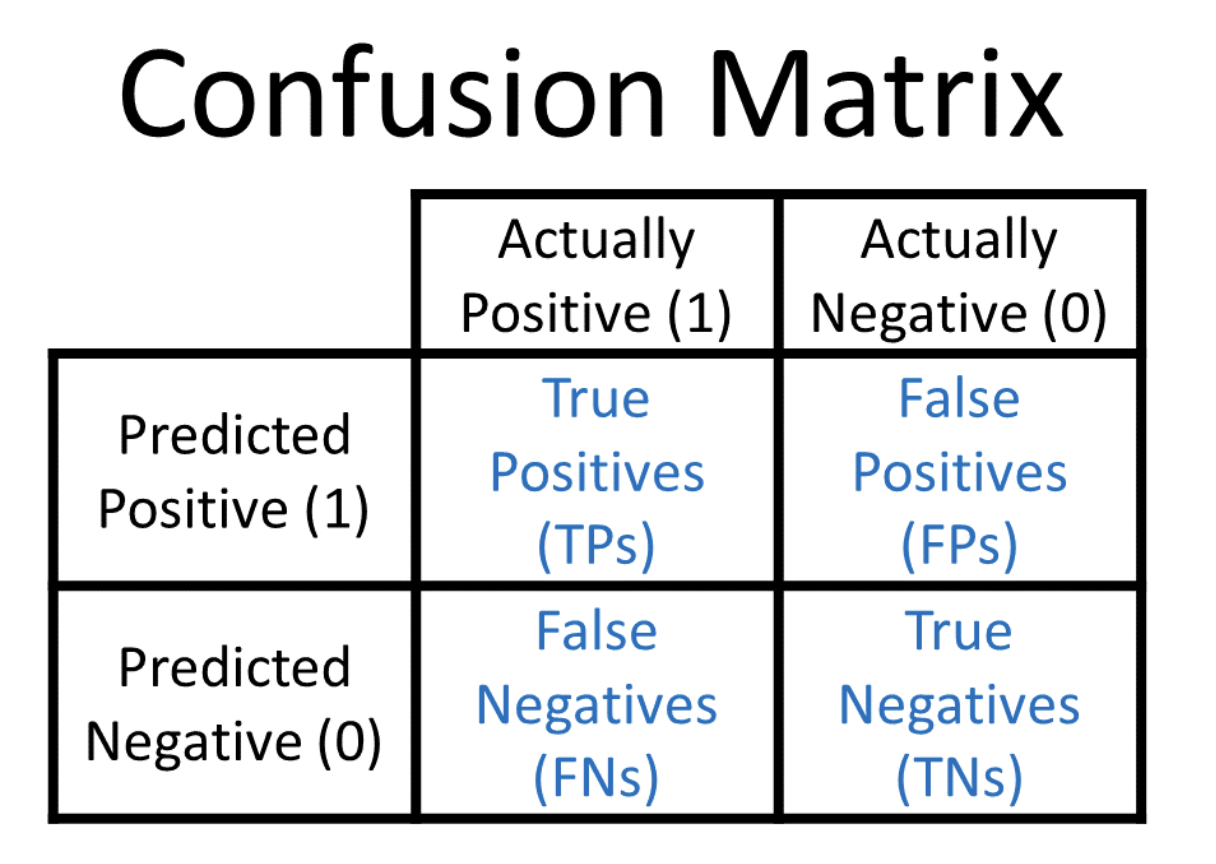

In [253]:
#defining function to display confusion matrix
import matplotlib.pyplot as plt  
from sklearn.metrics import ConfusionMatrixDisplay

def confmatrix(y_test,prediction):
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        prediction,
        cmap=plt.cm.cool,
    )
    plt.show()

# Logistic Regression

In [139]:
xtrain = dfTrain.drop(['Income ','workclass','race','native-country','occupation','sex','marital-status','age'],axis=1)
ytrain = dfTrain['Income ']
xtest = dfTest.drop(['Income ','workclass','race','native-country','occupation','sex','marital-status','age'],axis=1)
ytest = dfTest['Income ']


In [140]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29096 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   education-num   29096 non-null  int64
 1   relationship    29096 non-null  int64
 2   capital-gain    29096 non-null  int64
 3   capital-loss    29096 non-null  int64
 4   hours-per-week  29096 non-null  int64
dtypes: int64(5)
memory usage: 2.3 MB


In [141]:
model = LogisticRegression(random_state=44) #create logistic regression instance
model.fit(xtrain, ytrain)  #fit the model instance 
ypred = model.predict(xtest) # calculate predictions

### Model Evaluation

In [142]:
accuracy = accuracy_score(ytest, ypred)
print(accuracy*100)

81.8861000065535


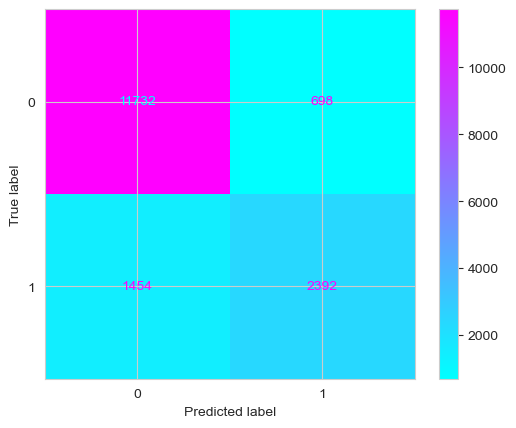

In [254]:
confmatrix(ytest,ypred)

In [161]:
# Calculate precision
precision = precision_score(ytest, ypred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(ytest, ypred)
print("Recall:", recall)

Precision: 0.7360890302066773
Recall: 0.38002735978112173


In [162]:
f1 = f1_score(ytest, ypred)
print("F1 Score:", f1)

F1 Score: 0.5012630819198844


# SVM

In [164]:
xtrain = dfTrain.drop(['Income ','workclass','marital-status','race','native-country','sex','occupation','age'],axis=1)
ytrain = dfTrain['Income ']
xtest = dfTest.drop(['Income ','workclass','marital-status','race','native-country','sex','occupation','age'],axis=1)
ytest = dfTest['Income ']

In [165]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29096 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   education-num   29096 non-null  int64
 1   relationship    29096 non-null  int64
 2   capital-gain    29096 non-null  int64
 3   capital-loss    29096 non-null  int64
 4   hours-per-week  29096 non-null  int64
dtypes: int64(5)
memory usage: 2.3 MB


In [166]:
model=LinearSVC(max_iter = 30000,random_state=44)
model.fit(xtrain,ytrain)
xpred=model.predict(xtrain)
ypred=model.predict(xtest)

/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Model Evaluation

In [167]:
accuracy = accuracy_score(ytest, ypred)
print(accuracy*100)

80.10354544858772


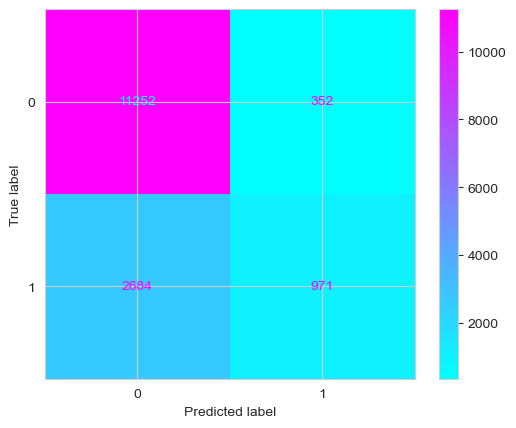

In [168]:
confmatrix(ytest,ypred)

In [169]:
# Calculate precision
precision = precision_score(ytest, ypred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(ytest, ypred)
print("Recall:", recall)

Precision: 0.7339380196523053
Recall: 0.2656634746922025


In [170]:
f1 = f1_score(ytest, ypred)
print("F1 Score:", f1)

F1 Score: 0.39011651265568503


# Decision Tree 

In [171]:
xtrain = dfTrain.drop(['Income ','workclass','marital-status','race','native-country','sex','occupation','age'],axis=1)
ytrain = dfTrain['Income ']
xtest = dfTest.drop(['Income ','workclass','marital-status','race','native-country','sex','occupation','age'],axis=1)
ytest = dfTest['Income ']

In [172]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

### Model Evaluation

In [173]:
accuracy = accuracy_score(ytest, ypred)
print(accuracy*100)

85.55606527295366


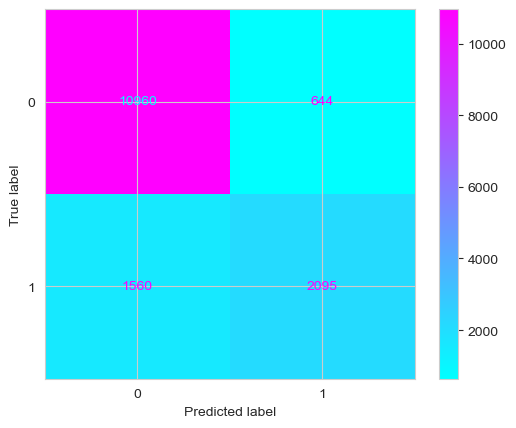

In [174]:
confmatrix(ytest,ypred)

In [175]:
# Calculate precision
precision = precision_score(ytest, ypred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(ytest, ypred)
print("Recall:", recall)

Precision: 0.764877692588536
Recall: 0.573187414500684


In [176]:
f1 = f1_score(ytest, ypred)
print("F1 Score:", f1)

F1 Score: 0.6553018454801377


# Random Forest

In [303]:
xtrain = dfTrain.drop(['Income ','workclass','marital-status','race','native-country','fnlwgt','sex','age','occupation'],axis=1)
ytrain = dfTrain['Income ']
xtest = dfTest.drop(['Income ','workclass','marital-status','race','native-country','fnlwgt','sex','age','occupation'],axis=1)
ytest = dfTest['Income ']

In [177]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

### Model Evaluation

In [178]:
accuracy = accuracy_score(ytest, ypred)
print(accuracy*100)

85.57572580116653


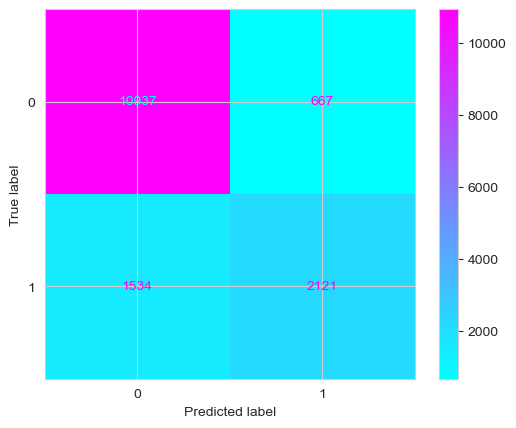

In [179]:
confmatrix(ytest,ypred)

In [180]:
# Calculate precision
precision = precision_score(ytest, ypred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(ytest, ypred)
print("Recall:", recall)

Precision: 0.7607604017216643
Recall: 0.5803009575923392


In [181]:
f1 = f1_score(ytest, ypred)
print("F1 Score:", f1)

F1 Score: 0.6583889492472451


# XGboost

In [240]:
xtrain = dfTrain.drop(['Income ','workclass','marital-status','race','native-country','sex','occupation'],axis=1)
ytrain = dfTrain['Income ']
xtest = dfTest.drop(['Income ','workclass','marital-status','race','native-country','sex','occupation'],axis=1)
ytest = dfTest['Income ']

In [241]:
import xgboost as xgb

In [249]:
model = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.04,max_depth=5,gamma=0.11)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

### Model Evaluation:

In [250]:
accuracy = accuracy_score(ytest, ypred)
print(accuracy*100)

86.77807815188007


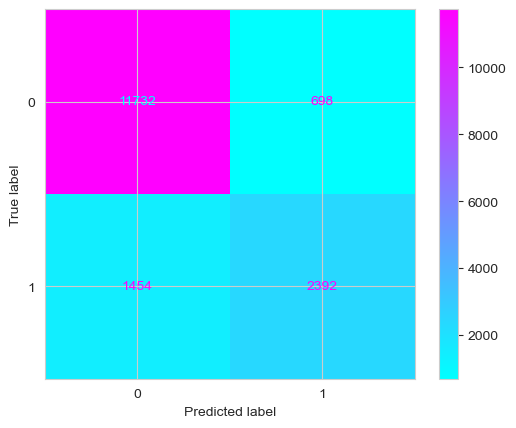

In [244]:
confmatrix(ytest,ypred)

In [245]:
# Calculate precision
precision = precision_score(ytest, ypred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(ytest, ypred)
print("Recall:", recall)

Precision: 0.7741100323624596
Recall: 0.6219448777951118


In [246]:
f1 = f1_score(ytest, ypred)
print("F1 Score:", f1)

F1 Score: 0.6897347174163783
